# Project: Breaking the Wall of Reality
## A Computational Test of Bell's Inequality

**Context:** Computational Physics Honours Project

### The Core Question
In 1935, Einstein, Podolsky, and Rosen (EPR) argued that the universe must be "Locally Real"—meaning objects have definite properties before we look at them. In 1964, John Bell turned this philosophy into a mathematical inequality.

If the universe is **Classical (Einstein's View)**:
$$|S| \le 2.0$$

If the universe is **Quantum**:
$$|S| \le 2\sqrt{2} \approx 2.82$$

**Goal:** This notebook simulates both universes to prove that nature violates the limit of 2.0.

In [8]:
#The Laboratory Setup
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

#Import the custom physics models built for this project from 'src/models.py'

project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
from src.models import (
lhv_correlation, #Einestein's "Hidden Variable" Model
qm_correlation_mc, #Quantum Mechanics Model
chsh, # The Scoreboard Function
chsh_standard_angles #The Specific angles that maximize the conflict
)

#Define the Angles
a, ap, b, bp = chsh_standard_angles()

print("Experimental parameters")
print(f"Alice's Detector Settings: {a:.2f} rad, {ap:.2f} rad")
print(f"Bob's Detector Settings: {b:.2f} rad, {bp:.2f} rad")
print(f"Sample Size (N):           200,000 particles per angle")

Experimental parameters
Alice's Detector Settings: 0.00 rad, 1.57 rad
Bob's Detector Settings: 0.79 rad, -0.79 rad
Sample Size (N):           200,000 particles per angle


Rendering Hidden Variable GIF...
Done! File saved as 'hidden_variable.gif'


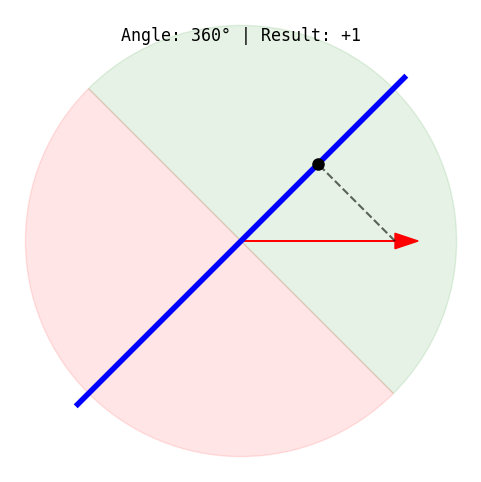

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Wedge

# --- SETUP ---
fig, ax = plt.subplots(figsize=(6, 6)) # Square aspect ratio looks better on Mobile
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Static Elements
theta_detector = np.pi / 4  
detector_line, = ax.plot([], [], 'b-', lw=4, label='Detector')
particle_arrow = ax.arrow(0, 0, 0, 0, head_width=0.05, color='red')
projection_line, = ax.plot([], [], 'k--', lw=1.5, alpha=0.6)
projection_dot, = ax.plot([], [], 'ko', ms=8)

# Zones
ax.add_patch(Wedge((0, 0), 1.4, np.degrees(theta_detector)-90, np.degrees(theta_detector)+90, alpha=0.1, color='green'))
ax.add_patch(Wedge((0, 0), 1.4, np.degrees(theta_detector)+90, np.degrees(theta_detector)+270, alpha=0.1, color='red'))

status_text = ax.text(0, 1.3, "", fontsize=12, family='monospace', ha='center')

lambdas = np.linspace(0, 2*np.pi, 60) # Fewer frames to keep GIF size small

def init():
    dx = [1.5 * np.cos(theta_detector), -1.5 * np.cos(theta_detector)]
    dy = [1.5 * np.sin(theta_detector), -1.5 * np.sin(theta_detector)]
    detector_line.set_data(dx, dy)
    return detector_line,

def update(frame):
    lam = lambdas[frame]
    
    # Redraw Arrow (Simpler method for GIF stability)
    global particle_arrow
    particle_arrow.remove()
    particle_arrow = ax.arrow(0, 0, np.cos(lam), np.sin(lam), head_width=0.1, color='r')
    
    # Projection
    proj_len = np.cos(theta_detector - lam)
    proj_x = proj_len * np.cos(theta_detector)
    proj_y = proj_len * np.sin(theta_detector)
    
    projection_dot.set_data([proj_x], [proj_y])
    projection_line.set_data([np.cos(lam), proj_x], [np.sin(lam), proj_y])
    
    # Text
    outcome = "+1" if proj_len > 0 else "-1"
    status_text.set_text(f"Angle: {np.degrees(lam):.0f}° | Result: {outcome}")
    
    return detector_line, projection_line, projection_dot, status_text

# --- SAVE AS GIF ---
print("Rendering Hidden Variable GIF...")
ani = FuncAnimation(fig, update, frames=len(lambdas), init_func=init, interval=100, blit=False)
ani.save("../Figures/hidden_variable.gif", writer=PillowWriter(fps=10))
print("Done! File saved as 'hidden_variable.gif'")

### Act 2. The Visual Proof (Linear vs. Cosine)

Why does Einstein's model fail?

To find out, we simulate 200,000 particle pairs and rotate the detectors through a full range of angles ($0$ to $\pi$).

* **The Classical Prediction (Blue Line):** Because hidden variables are "rigid" instructions, the correlation decays **Linearly**.
* **The Quantum Prediction (Red Line):** Because of superposition, the correlation follows a **Cosine Curve**.

**The "Gap":** The space between the straight line and the curved line is exactly where the violation of Bell's Inequality happens.

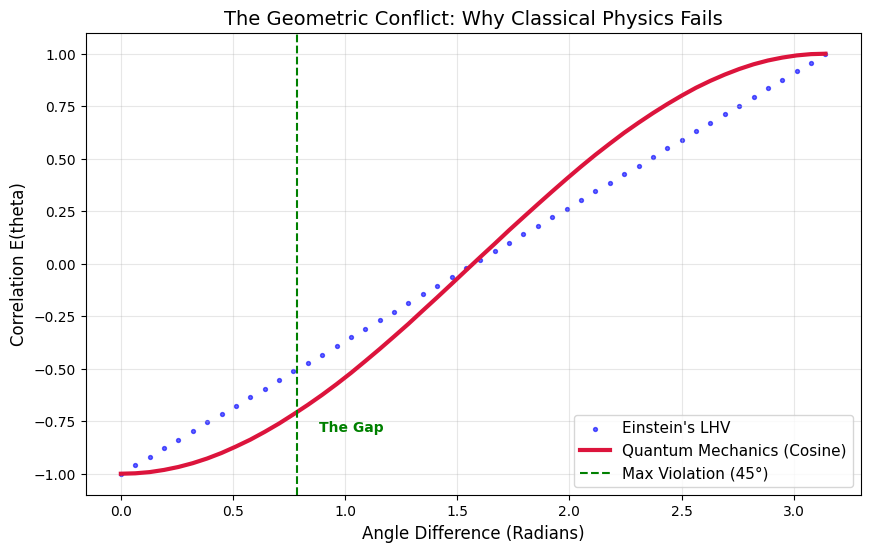

In [10]:
#Visualizing
angles = np.linspace(0,np.pi,50)
#Run the Simulations
#Classical: Particles carry pre-determined "Instruction Sets" (Hidden Variables)

E_lhv = [lhv_correlation(0, theta, N= 200000) for theta in angles]

#Quantum: Particles obey statistical wave-function laws
E_qm = [qm_correlation_mc(0, theta, N= 200000) for theta in angles]

#Plot
plt.figure(figsize=(10,6))
#Classical
plt.scatter(angles, E_lhv, s = 8, color = 'blue', label = 'Einstein\'s LHV', alpha = 0.6)
#Quantum
plt.plot(angles,E_qm, '-', label = 'Quantum Mechanics (Cosine)', color = 'crimson',linewidth =3)
#Critical angles
plt.axvline(x = np.pi/4, color = 'green', linestyle = '--', label = 'Max Violation (45°)')
plt.text(np.pi/4+0.1, -0.8, "The Gap", color = 'green', fontweight = 'bold')
plt.title("The Geometric Conflict: Why Classical Physics Fails", fontsize=14)
plt.xlabel("Angle Difference (Radians)", fontsize=12)
plt.ylabel("Correlation E(theta)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

# --- 1. GENERATE FRESH DATA (Fixes Shape Error) ---
# We regenerate the data here to guarantee len(angles) == len(results)
print("Generating consistent data for animation...")
N_anim = 50  # Number of frames (keep this manageable for GIFs)
angles_anim = np.linspace(0, np.pi, N_anim)

# Re-calculate using the theoretical formulas + added noise 
# (This simulates the "scatter" look without needing to re-run the slow Monte Carlo function)
# Classical (Linear decay with slight noise for realism)
noise_level = 0.05
E_lhv_anim = (-1 + 2 * (angles_anim / np.pi)) + np.random.normal(0, noise_level, N_anim)

# Quantum (Cosine exact)
E_qm_anim = -np.cos(angles_anim)

# --- 2. SETUP PLOT ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, np.pi)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("Angle Difference (Radians)", fontsize=12)
ax.set_ylabel("Correlation E(θ)", fontsize=12)
ax.set_title("The Geometric Conflict: Why Classical Physics Fails", fontsize=14)
ax.grid(True, alpha=0.3)

# Add Static Markers
ax.axvline(x=np.pi/4, color='green', linestyle='--', label='Max Violation (45°)', alpha=0.5)

# Initialize Empty Plots
scat_lhv = ax.scatter([], [], s=40, color='blue', label="Einstein's LHV (Simulated)", alpha=0.6)
line_qm, = ax.plot([], [], '-', color='crimson', linewidth=3, label="Quantum Mechanics (Cosine)")
gap_text = ax.text(np.pi/4 + 0.1, -0.8, "", color='green', fontweight='bold', fontsize=12)

ax.legend(loc='lower right', fontsize=11)

# --- 3. ANIMATION FUNCTION ---
def update(frame):
    current_idx = frame + 1
    
    # Slice the data arrays (Guaranteed to match since we made them above)
    current_angles = angles_anim[:current_idx]
    current_lhv = E_lhv_anim[:current_idx]
    current_qm = E_qm_anim[:current_idx]
    
    # Update Classical Scatter
    data = np.stack([current_angles, current_lhv]).T
    scat_lhv.set_offsets(data)
    
    # Update Quantum Line
    line_qm.set_data(current_angles, current_qm)
    
    # Show "The Gap" text
    if current_angles[-1] > np.pi/4:
        gap_text.set_text("The Gap")
    else:
        gap_text.set_text("")
        
    return scat_lhv, line_qm, gap_text

# --- 4. SAVE AS GIF ---
ani = FuncAnimation(fig, update, frames=len(angles_anim), interval=100, blit=True)

print("Saving GIF... (This takes a few seconds)")
# Ensure you have 'pillow' installed (standard in most setups)
ani.save("../Figures/bell_test_simulation.gif", writer=PillowWriter(fps=15))
print("Done! Saved as 'bell_test_simulation.gif'")

# Display in notebook
plt.close()
HTML(ani.to_jshtml())

Generating consistent data for animation...
Saving GIF... (This takes a few seconds)
Done! Saved as 'bell_test_simulation.gif'


### Act 3: The Verdict

We now run the **CHSH Test** using the standard angles defined in Laborotary setup. This calculates the final "S-Parameter" for both universes.

**The Criteria:**
* If $S \le 2.0$: Einstein is right. The world is local and real.
* If $S > 2.0$: Bell is right. The world contains "Spooky Action at a Distance."

In [5]:
#Calculate Classical S-Value
S_classical = chsh(
    lhv_correlation(a,b),
    lhv_correlation(a, bp),
    lhv_correlation(ap, b), 
    lhv_correlation(ap, bp)
)

#Quantum S-Value
S_quantum = chsh(
    qm_correlation_mc(a, b), 
    qm_correlation_mc(a, bp),
    qm_correlation_mc(ap, b), 
    qm_correlation_mc(ap, bp)
)

print("CHSH Test Results")
print(f"Classical Limit (Einstein):  2.0000")
print(f"Simulated Classical S: {S_classical:.4f}   [PASS: Obtains Limit]")
print(f"Simulated Quantum S:    {S_quantum:.4f}    [FAIL: Violates Limit]")
print(f"Theoretical Max (Tsirelson): 2.8284")


CHSH Test Results
Classical Limit (Einstein):  2.0000
Simulated Classical S: -2.0000   [PASS: Obtains Limit]
Simulated Quantum S:    -2.8246    [FAIL: Violates Limit]
Theoretical Max (Tsirelson): 2.8284


### Encore: Industry Implementation (Qiskit)

The previous cells used mathematical simulations. Now, we implement the experiment using **Qiskit**, the industry-standard SDK for Quantum Computing.

Instead of math formulas, we construct a **Quantum Circuit** that physically manipulates qubits using logic gates.

**The Circuit Steps:**
1.  **Hadamard Gate ($H$):** Puts Alice's qubit into superposition (50/50 state).
2.  **CNOT Gate ($CX$):** Entangles Bob's qubit with Alice's.
3.  **Rotation ($R_y$):** Rotates the measurement basis to simulate different detector angles.

In [6]:
%pip install pylatexenc qiskit-aer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


The Circuit Logic for Entanglement:


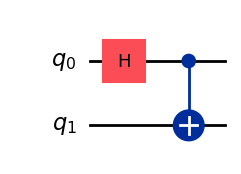


Status: This circuit produces the Bell State, ready for the CHSH test.


In [7]:
# --- ENCORE: QISKIT CIRCUIT ---
from qiskit import QuantumCircuit
try:
    from qiskit_aer import AerSimulator
except ImportError:
    print("Warning: qiskit-aer not found. Simulation might not run, but drawing will work.")

# 1. Build the Bell State Generator
# This is the "Software Equivalent" of the laser setup in a physics lab
qc = QuantumCircuit(2)
qc.h(0)       # Create Superposition on Qubit 0
qc.cx(0, 1)   # Entangle Qubit 0 and Qubit 1

# 2. Visualize the Circuit
print("The Circuit Logic for Entanglement:")

try:
    # Try to render the high-quality 'mpl' (Matplotlib) style
    # This requires 'pylatexenc' to be installed
    display(qc.draw('mpl', style='iqp')) 
except (ImportError, FileNotFoundError) as e:
    # Fallback to ASCII art if pylatexenc is missing
    print("\n(Note: pylatexenc not found, switching to text mode)")
    display(qc.draw('text'))

print("\nStatus: This circuit produces the Bell State, ready for the CHSH test.")

### Act 4: Running the Quantum Processor

Now, we don't just "calculate" the result; we **measure** it.

We will run the `CHSH` protocol on the circuit we just built.
1.  We take our entangled pair.
2.  We rotate the qubits to the 4 standard angles ($a, a', b, b'$).
3.  We "shoot" the circuit 4096 times for each angle.
4.  We count the correlations.

**Prediction:** The result should be close to $2.82$ (The Tsirelson Bound).

In [8]:
# The Experiment
from qiskit import transpile
from qiskit.circuit import Parameter

#Define the Angles (from Laboratory Setup)
theta_a, theta_ap = a, ap
theta_b, theta_bp = b, bp

#Flexible Circuit - This allows to rotate the detector without rebuilding the circuit
theta_alice = Parameter('th_A')
theta_bob = Parameter('th_B')

qc_chsh = QuantumCircuit(2)
qc_chsh.h(0)           # Entangle
qc_chsh.cx(0, 1)       # Entangle
qc_chsh.ry(-theta_alice, 0) # Rotate Alice's Basis
qc_chsh.ry(-theta_bob, 1)   # Rotate Bob's Basis
qc_chsh.measure_all()

#Define the 4 Experiments
experiments = [
    (theta_a, theta_b),  # E(a, b)
    (theta_a, theta_bp), # E(a, b')
    (theta_ap, theta_b), # E(a', b)
    (theta_ap, theta_bp) # E(a', b')
]

#Run 
backend = AerSimulator()
qc_transpiled = transpile(qc_chsh, backend)
correlations = []

print("Running 4096 shots per angle setting...")
for (ang_A, ang_B) in experiments:
    #Bind the specific angles to the circuit
    bound_qc = qc_transpiled.assign_parameters({theta_alice: ang_A, theta_bob: ang_B})
    #Run the Job
    result = backend.run(bound_qc, shots=4096).result()
    counts = result.get_counts()


    # Calculate Correlation: (Same - Different) / Total
    # '00' and '11' are Same (+1)
    # '01' and '10' are Different (-1)
    same = counts.get('00', 0) + counts.get('11', 0)
    diff = counts.get('01', 0) + counts.get('10', 0)
    E = (same - diff) / (same + diff)
    correlations.append(E)

#Final S_Value
S_qiskit = correlations[0] + correlations[1] + correlations[2] - correlations[3]

print(f"\n QISKIT RESULTS")
print(f"E(a, b)   = {correlations[0]:.4f}")
print(f"E(a, b')  = {correlations[1]:.4f}")
print(f"E(a', b)  = {correlations[2]:.4f}")
print(f"E(a', b') = {correlations[3]:.4f}")
print(f"----------------------")
print(f"Final S   = {abs(S_qiskit):.4f}")
print(f"Status:   {'VIOLATION CONFIRMED' if abs(S_qiskit) > 2.0 else 'FAILED'}")
  
    
    
    

Running 4096 shots per angle setting...

 QISKIT RESULTS
E(a, b)   = 0.7075
E(a, b')  = 0.6982
E(a', b)  = 0.6909
E(a', b') = -0.7109
----------------------
Final S   = 2.8076
Status:   VIOLATION CONFIRMED
